In [55]:
import pandas as pd
import sqlite3
import re
# import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# nltk.download()

Lets query our data from the table indeed_jobs that is in the SQLite database named jobs 

In [56]:
# Make a connection to the SQLite db and read in the indeed_jobs
con = sqlite3.connect("data/jobs") #use this for my production environment
# con = sqlite3.connect("jobs") #using this for turning in the project since they will not have the data subfolder
jobs_df = pd.read_sql_query("SELECT * from indeed_jobs", con)
jobs_df.drop(columns=['index'], inplace=True)
con.close()
# If you don't want to connect to the database you can read from the csv saved down on 3/10/22
# jobs_df = pd.read_csv('data/indeed_jobs.csv')

Let drop our duplicates by comparing the job_href column and also drop any entries that doesn't have a job description

In [57]:
# jobs_df = pd.read_csv('data/indeed_jobs.csv') #read in the indeed jobs csv
# jobs_df.drop(columns='Unnamed: 0', inplace=True)
jobs_df = jobs_df.drop_duplicates(subset=['job_href']) #drop duplicates using the job url
jobs_df = jobs_df[jobs_df['job_desc']!='No Job Description'] #drop any jobs that didn't find a job description

We need to catagorize our job titles, just because we searched for data scientist doesn't mean we only received data scientist jobs.  During a search for data scientists, we might get back some software engineer jobs, or during a search for a data engineer role, we might have received a computer engineer role. There are far too many variations of job titles to specify each one so we’ll have to look for our keywords no matter the order (i.e. machine learning engineer is the same as an engineer, machine learning). 

In [58]:
def set_job_category(job_title):
    regex = re.compile('[^a-zA-Z]')
    clean_title = regex.sub('', job_title)
    clean_title = clean_title.lower()
    if all(x in clean_title for x in ["data", "scien"]):
        return "Data Scientist"
    elif all(x in clean_title for x in ["business", "analy"]):
        return "Business Intelligence Analyst"
    elif all(x in clean_title for x in ["bi", "analy"]):
        return "Business Intelligence Analyst"
    elif all(x in clean_title for x in ["data", "analy"]):
        return "Data Analyst"
    elif all(x in clean_title for x in ["machine", "learning"]):
        return "Machine Learning Engineer"
    elif all(x in clean_title for x in ["data", "engineer"]):
        return "Data Engineer"
    elif all(x in clean_title for x in ["software", "engin"]):
        return "Software Engineer"
    elif all(x in clean_title for x in ["architect"]):
        return "Data Architect"
    else:
        return "Other"
jobs_df['job_category'] = jobs_df.loc[:, 'job_title'].apply(set_job_category)

In [59]:
jobs_df['retrieve_date'].value_counts()

2022-02-19    1390
2022-03-05    1365
2022-03-28    1312
2022-02-26    1270
2022-02-12    1257
2022-03-14    1181
2022-04-10    1150
2022-04-04    1045
2022-03-19     865
2022-02-07     765
2022-02-06     648
2022-04-03     543
2022-04-11     508
2022-03-15       6
Name: retrieve_date, dtype: int64

In [60]:
jobs_df.tail(10)

,job_title,company_name,company_location,est salary,job_href,job_desc,est_salary,retrieve_date,job_category
17169,Business Systems Analyst II,Navy Federal Credit Union,"Winchester, VA+1 location",None,https://www.indeed.com/rc/clk?jk=4d1fde48c0e10...,YOUR LIFE'S MISSION: POSSIBLE You have goa...,$30 - $47 an hour,2022-04-11,Business Intelligence Analyst
17170,Business Analyst/Staff Support Specialist,ADVANCED MANAGEMENT STRATEGIES GROUP(AMSG),"Fort Eustis, VA",None,https://www.indeed.com/rc/clk?jk=c7efb3ea1b62e...,ID: 1302 Location: ...,No Estimated Salary,2022-04-11,Business Intelligence Analyst
17174,Project Analyst I,ADP,"Hybrid remote in Maitland, FL 32751",None,https://www.indeed.com/rc/clk?jk=8ad0ac3f2a8ae...,ADP is hiring a Project Analyst I. In this ...,"$100,700 a year",2022-04-11,Other
17176,Business System Analyst,White Cap,"Orlando, FL 32806",None,https://www.indeed.com/rc/clk?jk=6e1b25a098d47...,A position at White Cap isn’t your ordinary jo...,No Estimated Salary,2022-04-11,Business Intelligence Analyst
17179,"Principal, Business Planning & Analysis",BNY Mellon,"Lake Mary, FL 32746",None,https://www.indeed.com/rc/clk?jk=60096974b5fb6...,Pershing provides a flexible and progressive w...,No Estimated Salary,2022-04-11,Business Intelligence Analyst
17180,Sr Business Analyst,PRICE WATERHOUSE COOPERS,"Orlando, FL 32801 (Central Business District a...",None,https://www.indeed.com/rc/clk?jk=4077e895b6fb6...,"A career in Information Technology, within Int...",No Estimated Salary,2022-04-11,Business Intelligence Analyst
17182,Data Analytics Senior Specialist/Lead,BNY Mellon,"Orlando, FL 32817",None,https://www.indeed.com/rc/clk?jk=ca921bc4f0d5b...,Join the innovative and transformative Enterpr...,No Estimated Salary,2022-04-11,Data Analyst
17183,Business Analytics - Finance Manager,PRICE WATERHOUSE COOPERS,"Remote in Orlando, FL 32801",None,https://www.indeed.com/rc/clk?jk=9a8712dd5d499...,"A career in Finance, within Internal Firm Serv...",No Estimated Salary,2022-04-11,Business Intelligence Analyst
17184,Business Intelligence Analyst 1,A. Duda & Sons Inc.,"Oviedo, FL",None,https://www.indeed.com/rc/clk?jk=f45dcd1332097...,"A. Duda and Sons, Inc. a privately owned com...",No Estimated Salary,2022-04-11,Business Intelligence Analyst
17185,Business Analyst,Andor Health,"Orlando, FL 32839",None,https://www.indeed.com/rc/clk?jk=612155e1b7cda...,The Business Analyst's role participates in ...,No Estimated Salary,2022-04-11,Business Intelligence Analyst


Lets take a look at any of the jobs that are marked 'Other' or 'Software Engineer'

In [54]:
# jobs_df.loc[16873,'job_href']
# jobs_df.loc[16873,'job_desc']

In [7]:
sample_df = jobs_df.loc[jobs_df['job_category'].isin(['Other', 'Software Engineer'])]
sample_df.loc[:,['job_title', 'job_category', 'company_name']].sample(6)

,job_title,job_category,company_name
11359,Director of IT - Pricing and Promotions,Other,Genuine Parts Company
5731,Infrastructure Compute and Storage Engineer,Other,G-Research
9090,Software Engineer,Software Engineer,Pariveda Solutions
3451,"Senior Analyst, Revenue Analytics",Other,Vail Resorts
15775,Cybersecurity Engineer,Other,"DevTech Systems, Inc."
1478,Customer Project Manager,Other,Cisco Systems


In [8]:
# limit the datafame to the target jobs
target_jobs = ['Data Scientist', 'Business Intelligence Analyst', 'Data Analyst', 'Machine Learning Engineer', 'Data Engineer']
jobs_df = jobs_df[jobs_df['job_category'].isin(target_jobs)].reset_index()

For my analysis I decided to do some research into common languages, cloud computing platforms and tools used by Data Scientists, Data Analysts, Business Intelligence Analysts, Machine Learning Engineers and Data Engineers. Since I have a background as a Data Analyst and Data Scientist my list might be a little bias.

In [7]:
languages = ['sql', 'r', 'c', 'python', 'java', 'nosql', 'scala', 'hql', 'julia', 'sas', 'javascript', 'matlab']
platforms = ['microsoft', 'azure', 'sas', 'gcp', 'google', 'ibm', 'amazon', 'aws', 'oracle', 'apache']
tools = ['splunk', 'cognos', 'mode', 'pytorch', 'hive', 'excel', 'spotfire', 'tibco spotfire', 'scikitlearn', 'toughtspot',
 'access', 'hadoop', 'rapidminer', 'sisense', 'qlikview', 'ibm cognos', 'tableau', 'google data studio', 'word',
 'power bi', 'metabase', 'tensorflow', 'scikit learn', 'sas business intelligence', 'oracle analytics cloud',
 'apache storm', 'analytics cloud', 'redash', 'jupyter notebook', 'IBM Cognos', 'kafka', 'apache spark',
 'powerbi', 'knime', 'sap businessobjects', 'talend', 'powerpoint', 'qlik', 'periscope data', 'spark', 'chartio',
 'domo', 'pig', 'thoughtspot', 'colab', 'looker', 'cassandra', 'elasticsearch', 'mapreduce' ]

lang_plat_tool_words = languages+platforms+tools

Using these words to limit the vocabulary I initialized nltk’s CountVectorizer. I had to enter my own token pattern because it’s default eliminates 1 letter words which I need to include for languages like C or R. I also needed to set ngrams = (1,3) since we have multiple word items in our vocabulary like ‘power bi’ or ‘sas business intelligence’. I then used CountVectorizer to transform the column of job descriptions into a dataframe that has a row for every job description and a column for each word in the vocabulary. The initial transformation has numbers that reference a word as the columns so I needed to replace the numbers with the words and add the job category back so we can group by that when we create our visualizations.

In [8]:
#create our jobs CountVectorizer object that is initialized with ngrams 1-3
# and also only includes words from our list of keywords
job_cv = CountVectorizer(ngram_range=(1,3), vocabulary=set(lang_plat_tool_words),token_pattern=r"(?u)\b\w+\b")

In [9]:
#Transform the job descriptions into a sparse matrix where each row is a document and each column is a token
cv_df = job_cv.transform(jobs_df.loc[:,'job_desc'])
#Turn the sparce matrix into a pandasa dataframe and give it readable column names that relate to the token that the number is for
cv_df = pd.DataFrame(cv_df.toarray(),index=jobs_df.index, columns=job_cv.get_feature_names_out())
# Join the job_category column from the origional dataframe
cv_df = cv_df.join(jobs_df['job_category'])

In [10]:
#The below code is used to combine the cv_df for keywords that reference the same thing and then drops one of the columns
def combine_kw(df):
    df.loc[:,'amazon'] = df.loc[:,'aws']+df.loc[:,'amazon']
    df.loc[:,'google'] = df.loc[:,'gcp']+df.loc[:,'google']
    df.loc[:,'power bi'] = df.loc[:,'powerbi']+df.loc[:,'power bi']
    df.loc['microsoft'] = df.loc[:,'microsoft']+df.loc[:,'azure']
    df.drop(columns=['aws', 'powerbi', 'gcp', 'azure'], inplace=True)
    return df
cv_df = combine_kw(cv_df)

Get the sum of keyword count by job category. We can accomplish this by simply taking the sum after grouping by job category.

In [11]:
cv_sum_df = cv_df.groupby('job_category').sum()


Get the sum of keyword counts divided by number of job postings by job category. We can accomplish this by dividing each row by its respective job category’s entry count.

In [12]:
job_valcnt_df = jobs_df['job_category'].value_counts()
jobs_tfddf_df = cv_sum_df.div(job_valcnt_df, axis=0)

Get the percentage of job postings that included each keyword by job category. We can accomplish this by turning the countvectorized df boolean by making any number bigger than 0 equal to 1. Then do the same as above and divide each row by its respective job category’s entry count.

In [13]:
bool_jobs = cv_df.loc[:,cv_df.columns != 'job_category'].clip(upper=1).copy()
bool_jobs = bool_jobs.join(jobs_df['job_category'])
jobs_perc_df = bool_jobs.groupby('job_category').sum().div(job_valcnt_df, axis=0)

First we’ll visualize the programming languages. Since we’re not positive that all of the languages in our vocabulary were found we need to only include the languages that we found. We’ll then use matplotlib.pyplot to create a figure with 3 plots all in 1 column. We’ll then use pandas internat plotting function to plot each dataframe mentioned above and sort the vocabulary is descending order based on the ‘Data Scientist’ job category. Then we’ll clean it all up by calling tight_layout().

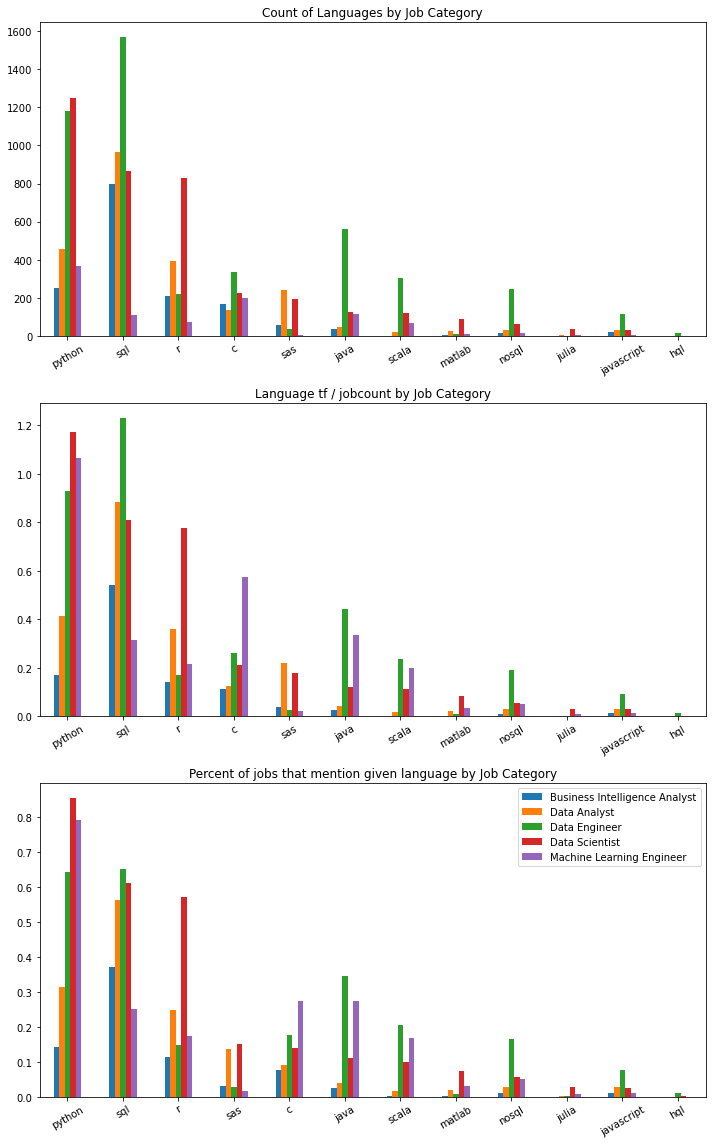

In [14]:
languages_found = list(set(cv_df.columns)&set(languages))
fig, axs = plt.subplots(3,1, figsize=(10,16))
cv_sum_df.T.loc[languages_found,:].sort_values(by=['Data Scientist'],ascending=False).plot.bar(title='Count of Languages by Job Category', sort_columns=True,rot=30,ax=axs[0], legend=False)
jobs_tfddf_df.T.loc[languages_found,:].sort_values(by=['Data Scientist'],ascending=False).plot.bar(title='Language tf / jobcount by Job Category', sort_columns=True,rot=30,ax=axs[1], legend=False)
jobs_perc_df.T.loc[languages_found,:].sort_values(by=['Data Scientist'],ascending=False).plot.bar(title='Percent of jobs that mention given language by Job Category', sort_columns=True,rot=30,ax=axs[2])
fig.tight_layout()
# plt.savefig('images/languages by job category')

For Data Scientists, and Data Engineers top 2 languages to know are Python and SQL. Data Analysts and Business Intelligence Analysts have the same top 2 as Data Scientists and Data Engineers but the demand for them to know python is much lower. It looks like there is a wider language demand for Machine Learning Engineers as their clear #1 is Python but their #2 is close between SQL, C, and Java. One thing that did surprise me is how high the demand is for Data Engineers to know java. 

Next lets visualize cloud platforms. We’ll do it in the same manner as the programming languages but with a different set of vocabulary. 


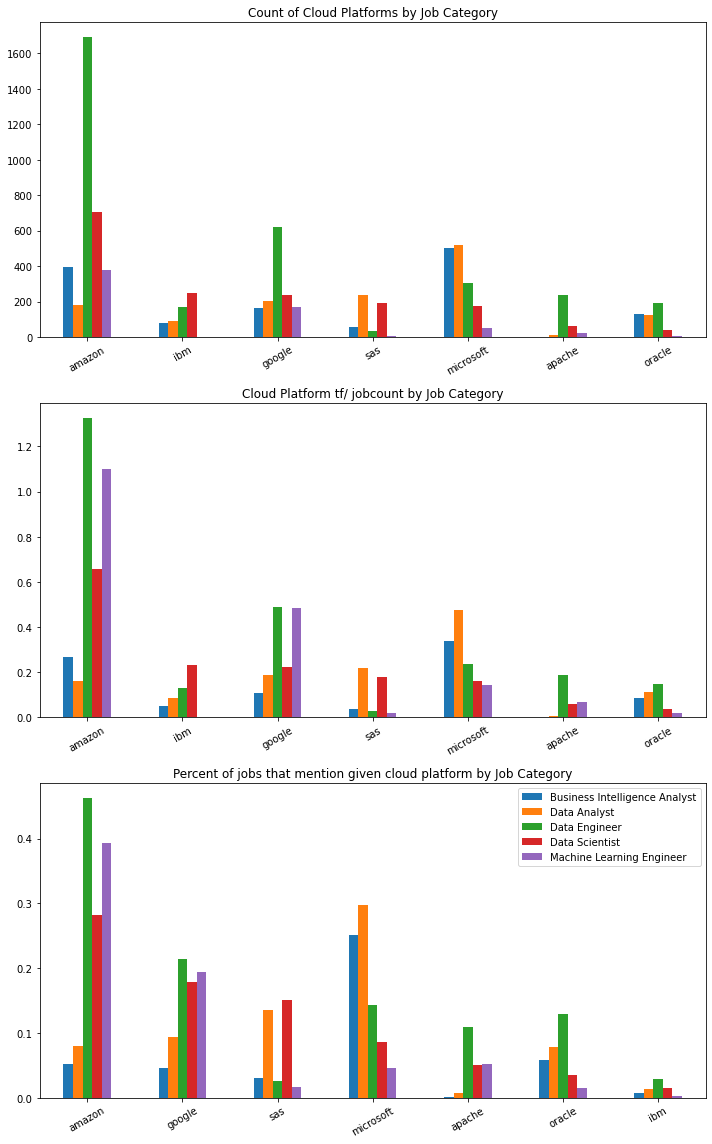

In [15]:
fig, axs = plt.subplots(3,1, figsize=(10,16))
platforms_found = list(set(cv_df.columns)&set(platforms))
cv_sum_df.T.loc[platforms_found,:].sort_values(by=['Data Scientist'],ascending=False).plot.bar(title='Count of Cloud Platforms by Job Category', sort_columns=True,rot=30,ax=axs[0], legend=False)
jobs_tfddf_df.T.loc[platforms_found,:].sort_values(by=['Data Scientist'],ascending=False).plot.bar(title='Cloud Platform tf/ jobcount by Job Category', sort_columns=True,rot=30,ax=axs[1], legend=False)
jobs_perc_df.T.loc[platforms_found,:].sort_values(by=['Data Scientist'],ascending=False).plot.bar(title='Percent of jobs that mention given cloud platform by Job Category', sort_columns=True,rot=30,ax=axs[2])
fig.tight_layout()
plt.savefig('images/platforms by job category')

Amazon and Google are the clear winners for Data Scientists, Data Engineers and Machine Learning Engineers. This is pretty surprising because whenever I see the Cloud Platform market capitalization that Amazon and Microsoft are usually the clear leader with Google lagging behind. I’m also surprised that SAS is mentioned more often for data scientists than Microsoft (including Azure). 

Microsoft is the clear number 1 for Data Analysts and Data Engineers, I expect this is because they’ll be leveraging Microsoft Excel and PowerPoint.

Finally lets visualize the tools, which is really all of the keywords that I found to search that aren’t a programming language or platform. Since we have so many we’ll limit them to the top 15 for data scientists. 


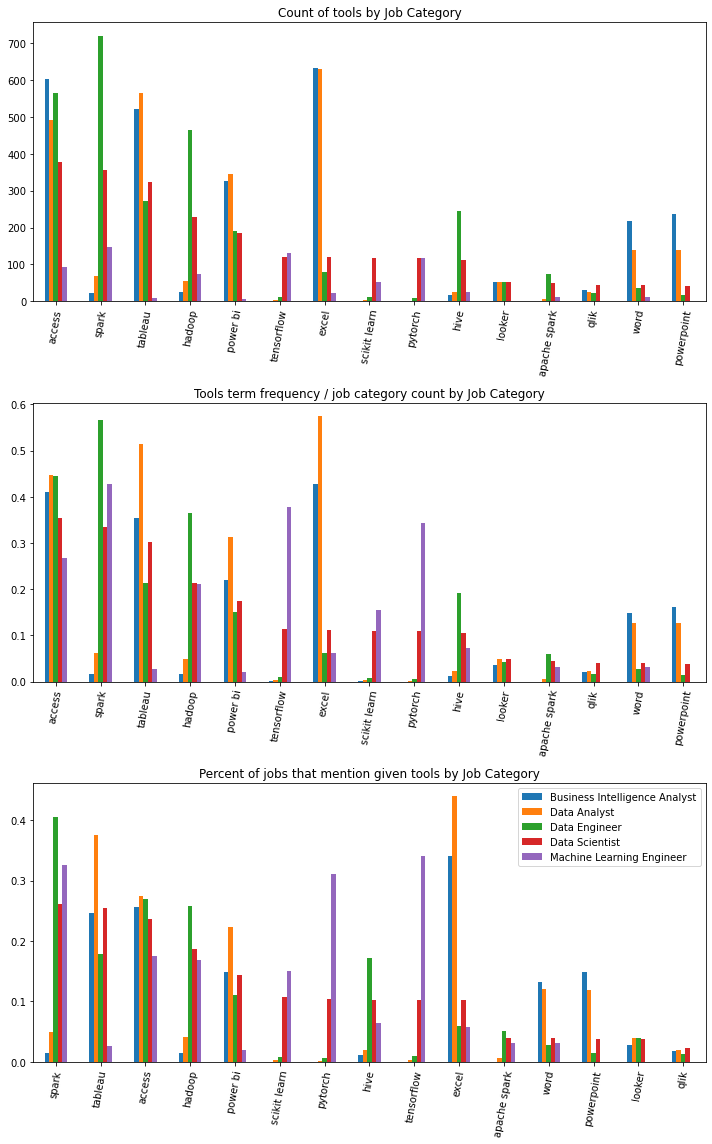

In [16]:
tools_found = list(set(cv_df.columns)&set(tools))
fig, axs = plt.subplots(3,1, figsize=(10,16))
cv_sum_df.T.loc[tools_found,:].sort_values(by=['Data Scientist'],ascending=False).head(15).plot.bar(title='Count of tools by Job Category', sort_columns=True,rot=80,ax=axs[0], legend=False)
jobs_tfddf_df.T.loc[tools_found,:].sort_values(by=['Data Scientist'],ascending=False).head(15).plot.bar(title='Tools term frequency / job category count by Job Category', sort_columns=True,rot=80,ax=axs[1], legend=False)
jobs_perc_df.T.loc[tools_found,:].sort_values(by=['Data Scientist'],ascending=False).head(15).plot.bar(title='Percent of jobs that mention given tools by Job Category', sort_columns=True,rot=80,ax=axs[2])
fig.tight_layout()
# plt.savefig('images/tools by job category')

Its not surprising that the top 5 for Data Science and Data Engineers have to do with storage/database and visualization tools. I am surprised with the difference between how much pytorch and tensorflow is mentioned for Machine Learning Engineers vs Data Scientists. As expected Microsoft Office tools were mentioned much more frequently for Data Analysts and Business Intelligence Analysts than the others. Data Analysts and Business Intelligence Analysts also lead in mentioning Tableau and PowerBI. I am interested in why access is mentioned so much across the board, I included it for Microsoft Access but I will have to look into if its being mentioned in some other reference. 

## Everything below this line is older code that is saved incase for reference
---------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Old Cleaning Method

In [17]:


# def clean_text(text):
#     regex = re.compile('[^a-zA-Z ]')
#     clean_text = regex.sub('', text) #remove punctuation and numbers
#     cl_text = clean_text.lower()
#     tokens = word_tokenize(cl_text)
#     stop_words = set(stopwords.words('english'))
#     words = [w for w in tokens if not w in stop_words]
#     return words

# jobs_df['clean_job_desc'] = jobs_df.loc[:, 'job_desc'].apply(clean_text)

#### Old Bag-of-Words methods

In [18]:
# #Need to look at pulling out bi-grams and tri-grams, we are currently splitting up 
# # machine learning, data science, deep learning, artificial intelligence, power bi
# # neural networks, transfer learning, linear regression, anomaly detection
# # multiple languages,

# import spacy
# from collections import Counter

# ds_bow = []
# for jw_list in jobs_df[jobs_df['job_category']=='Data Scientist'].loc[:,'clean_job_desc']:
#     ds_bow = ds_bow+jw_list
# ds_cv_df = Counter(ds_bow)

# da_bow = []
# for jw_list in jobs_df[jobs_df['job_category']=='Data Analyst'].loc[:,'clean_job_desc']:
#     da_bow = da_bow+jw_list
# da_cv_df = Counter(da_bow)

# from collections import Counter
# cntr = Counter(da_bow)
# cntr.most_common()

### Old Spacy ngrams from noun_chunks

In [19]:
# nlp = spacy.load('en_core_web_sm')
# def spacy_keywords(text):
#     doc = nlp(text)
#     for noun_phrase in list(doc.noun_chunks):
#         noun_phrase.merge(noun_phrase.root.tag_, noun_phrase.root.lemma_, noun_phrase.root.ent_type_)
#     return [(token.text,token.pos_) for token in doc]
# sample_ds_df['spacy_noun_chunks2']= sample_ds_df.loc[:, 'job_desc'].apply(spacy_keywords)

# for x in sample_ds_df['spacy_noun_chunks2'][2668]:
#     print(x)

### Old way to graph most popular keywords grouped by job category

In [20]:
# # 
# #plot the cv_df grouped by job_category, we're only going to grab the 20 largest words for data scientist
# cv_sum_df.T.nlargest(20,'Data Scientist').plot.bar(figsize=(16,8), title='Top 20 keywords for Data Scientists')
# plt.show()
# #plot the cv_df grouped by job_category, we're only going to grab the 20 largest words for data engineer
# cv_sum_df.T.nlargest(20,'Data Engineer').plot.bar(figsize=(16,8), title='Top 20 keywords for Data Engineers')
# plt.show()
# #plot the cv_df grouped by job_category, we're only going to grab the 20 largest words for data Analyst
# cv_sum_df.T.nlargest(20,'Data Analyst').plot.bar(figsize=(16,8), title='Top 20 keywords for Data Analysts')
# plt.show()
# #plot the cv_df grouped by job_category, we're only going to grab the 20 largest words for data Business Intelligence Analyst
# cv_sum_df.T.nlargest(20,'Business Intelligence Analyst').plot.bar(figsize=(16,8), title='Top 20 keywords for Business Intelligence Analysts')
# plt.show()
# #plot the cv_df grouped by job_category, we're only going to grab the 20 largest words for Machine Learning Engineer
# cv_sum_df.T.nlargest(20,'Machine Learning Engineer').plot.bar(figsize=(16,8), title='Top 20 keywords for Machine Learning Engineers')
# plt.show()

### Old Job Category

In [21]:
# def set_job_category(job_title):
#     data_scientist = ["applied", "science", "scientist", "vision", "statistician", 'statistical']
#     bi_analyst = ["business", "intelligence"]
#     data_analyst = ["analyst", "analytics"]
#     ml_engineer = ["machine", "learning"]
#     software_engineer = ["software", "front", "ruby", "stack"]
#     data_engineer = ["engineer"]
#     data_architect = ['architect']
#     regex = re.compile('[^a-zA-Z]')
#     clean_title = regex.sub('', job_title)
#     clean_title = clean_title.lower()
#     if any(x in clean_title for x in data_scientist):
#         return "Data Scientist"
#     elif any(x in clean_title for x in bi_analyst):
#         return "Business Intelligence Analyst"
#     elif any(x in clean_title for x in data_analyst):
#         return "Data Analyst"
#     elif any(x in clean_title for x in ml_engineer):
#         return "Machine Learning Engineer"
#     elif any(x in clean_title for x in software_engineer):
#         return "Software Engineer"
#     elif any(x in clean_title for x in data_engineer):
#         return "Data Engineer"
#     elif any(x in clean_title for x in data_architect):
#         return "Data Architect"
#     else:
#         return "Other"
# jobs_df['job_category'] = jobs_df.loc[:, 'job_title'].apply(set_job_category)

In [22]:
# ds_words = ['SQL', 'Excel', 'PowerPoint', 'R', 'Python', 'PowerBI', 'Tableau', 'Microsoft Office', 'Word', 
#         'sas', 'agile', 'c', 'visualizations', 'hadoop', 'databases', 'data analysis', 'pytorch', 
#         'optimize', 'pandas', 'deployment', 'gcp', 'azure', 'aws', 'mining', 'ibm', 'amazon', 'networks',
#         'classification', 'java', 'scikitlearn', 'transfer', 'tensorflow', 'visualization', 'google', 
#         'supervised', 'unsupervised', 'reinforcement', 'scikit learn', 'pytorch', 
#         'Weka', 'KNIME', 'colab', 'keras', 'shogun', 'catalyst', 'xgboost', 'lightgbm',
#         'catboost', 'stata', 'microsoft']
# ds_words = [word.lower() for word in ds_words]

# da_words = ['Python', 'R', 'SAS', 'Excel', 'access', 'Power BI', 'Tableau', 'Apache Spark',
#         'RapidMiner', 'KNIME', 'QlikView', 'Talend', 'Splunk', 'SAP BusinessObjects',
#         'Sisense', 'TIBCO Spotfire', 'Toughtspot', 'Qlik', 'SAS Business Intelligence',
#         'Google Data Studio', 'Redash', 'Periscope Data', 'Metabase', 'Jupyter Notebook',
#         'IBM Cognos', 'Chartio', 'Mode', 'Looker', 'Domo', 'Oracle Analytics Cloud', 
#         'PIG', 'HIVE', 'Apache Storm' 
#         ]
# da_words = [word.lower() for word in da_words]
# de_words = ['python', 'sql', 'postgresql', 'mongodb', 'spark', 'apache kafka', 'amazon', 
#         'redshift', 'snowflake', 'athena', 'airflow', 'hevo data', 'apache',
#         'bigquery', 'fivetran', 'dbt', 'cloudera data', 'hadoop', 'cassandra',
#         'kudu', 'hive', 'turbine', 'looker', 'segment', 'stitch', 'periscope',
#         'mode', 'presto', 'databand', 'nosql', 'scala', 'hql',
#         ]
# de_words = [word.lower() for word in de_words]

# mass_words = ds_words+da_words+de_words
# languages = ['sql', 'r', 'c', 'python', 'java', 'nosql', 'scala', 'hql', 'julia', 'sas', 'javascript', 'matlab', 'lua', 'perl', 'php', 'ruby']
# platforms = ['microsoft', 'azure', 'sas', 'gcp', 'google', 'ibm', 'amazon', 'aws', 'oracle', 'apache']
# tools = [word for word in mass_words if (word not in languages)&(word not in platforms)]

Old method for graphing

In [23]:
# jobs_tfddf_df.T.loc[languages,:].sort_values(by=['Data Scientist'],ascending=False).plot.bar(figsize=(16,10), title='Language term frequency / job category count by Job Category', sort_columns=True,rot=30)
# plt.show()
# platforms_found = list(set(cv_df.columns)&set(platforms))
# jobs_tfddf_df.T.loc[platforms_found,:].sort_values(by=['Data Scientist'],ascending=False).plot.bar(figsize=(16,10), title='Platform term frequency / job category count by Job Category', sort_columns=True,rot=30)
# plt.show()
# tools_found = list(set(cv_df.columns)&set(tools))
# jobs_tfddf_df.T.loc[tools_found,:].sort_values(by=['Data Scientist'],ascending=False).head(15).plot.bar(figsize=(16,10), title='Tools term frequency / job category count by Job Category', sort_columns=True,rot=30)
# # # plt.savefig('jobs_tools')
# plt.show()

#### Graph out the keywords for each kw group that we created

In [24]:
# cv_sum_df.T.loc[languages,:].sort_values(by=['Data Scientist'],ascending=False).plot.bar(figsize=(16,10), title='Count of Languages by Job Category', sort_columns=True,rot=30)
# # plt.savefig('job_languages')
# plt.show()
# platforms_found = list(set(cv_df.columns)&set(platforms))
# cv_sum_df.T.loc[platforms_found,:].sort_values(by=['Data Scientist'],ascending=False).plot.bar(figsize=(16,10), title='Count of Platforms by Job Category', sort_columns=True,rot=30)
# # plt.savefig('jobs_platforms')
# plt.show()
# tools_found = list(set(cv_df.columns)&set(tools))
# cv_sum_df.T.loc[tools_found,:].sort_values(by=['Data Scientist'],ascending=False).head(15).plot.bar(figsize=(16,10), title='Count of Tools by Job Category', sort_columns=True,rot=30)
# # plt.savefig('jobs_tools')
# plt.show()


#### Graph out the 20 largest keywords for each job category

In [25]:

# #plot the cv_df grouped by job_category, we're only going to grab the 20 largest words for data scientist
# cv_sum_df.T.nlargest(20,'Data Scientist').loc[:,'Data Scientist'].plot.bar(figsize=(16,8), title='Top 20 keywords for Data Scientists',rot=30)
# plt.show()
# #plot the cv_df grouped by job_category, we're only going to grab the 20 largest words for data engineer
# cv_sum_df.T.nlargest(20,'Data Engineer').loc[:,'Data Engineer'].plot.bar(figsize=(16,8), title='Top 20 keywords for Data Engineers',rot=30)
# plt.show()
# #plot the cv_df grouped by job_category, we're only going to grab the 20 largest words for data Analyst
# cv_sum_df.T.nlargest(20,'Data Analyst').loc[:,'Data Analyst'].plot.bar(figsize=(16,8), title='Top 20 keywords for Data Analysts',rot=30)
# plt.show()
# #plot the cv_df grouped by job_category, we're only going to grab the 20 largest words for data Business Intelligence Analyst
# cv_sum_df.T.nlargest(20,'Business Intelligence Analyst').loc[:,'Business Intelligence Analyst'].plot.bar(figsize=(16,8), title='Top 20 keywords for Business Intelligence Analysts',rot=30)
# plt.show()
# #plot the cv_df grouped by job_category, we're only going to grab the 20 largest words for Machine Learning Engineer
# cv_sum_df.T.nlargest(20,'Machine Learning Engineer').loc[:,'Machine Learning Engineer'].plot.bar(figsize=(16,8), title='Top 20 keywords for Machine Learning Engineers',rot=30)
# plt.show()

   2395 the
   1581 and
   1409 a
   1393 I
   1218 of
   1201 to
    833 in
    768 was
    613 he
    601 that
    478 s
    470 you
    465 it
    457 with
    453 his
    411 t
    390 at
    380 had
    369 her
    361 on
    327 me
    318 for
    290 she
    278 him
    266 Gatsby
    252 as
    244 He
    241 from
    235 said
    227 my
    217 all
    213 out
    193 up
    191 but
    191 Tom
    191 The
    188 an
    186 Daisy
    173 this
    173 there
    172 were
    169 we
    169 or
    167 into
    156 It
    147 about
    141 over
    140 by
    138 be
    137 one
    137 have
    132 if
    123 She
    121 You
    119 they
    119 like
    118 so
    118 down
    116 is
    114 man
    108 came
    108 back
    106 been
    105 when
    102 d
    101 who
    101 little
     99 know
     99 any
     95 house
     94 then
     93 some
     91 went
     91 not
     89 now
     89 just
     89 before
     88 eyes
     87 what
     85 Project
     85 Gutenberg
     84 o

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  299k  100  299k    0     0   457k      0 --:--:-- --:--:-- --:--:--  463k


     21 give
     21 end
     21 drive
     21 blue
     21 beside
     21 Come
     20 windows
     20 used
     20 stopped
     20 put
     20 may
     20 many
     20 loved
     20 girls
     20 fact
     20 dog
     20 butler
     20 body
     20 among
     20 Chicago
     19 window
     19 use
     19 trying
     19 tried
     19 town
     19 telephone
     19 summer
     19 office
     19 idea
     19 hot
     19 heart
     19 has
     19 hard
     19 good
     19 evening
     19 dress
     19 copyright
     19 chair
     19 business
     19 almost
     19 agreement
     19 ago
     19 Yes
     18 why
     18 sound
     18 passed
     18 ought
     18 mean
     18 itself
     18 inside
     18 happened
     18 grey
     18 friend
     18 far
     18 except
     18 dozen
     18 copy
     18 brought
     18 big
     18 better
     18 behind
     18 For
     17 whole
     17 talked
     17 slowly
     17 shook
     17 sent
     17 same
     17 remember
     17 rain
     17 person
 